In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import os

os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [3]:
!kaggle datasets download -d akash2907/bird-species-classification -p /content/dataset

100% 1.37G/1.37G [00:36<00:00, 43.5MB/s]
100% 1.37G/1.37G [00:36<00:00, 40.6MB/s]


In [4]:
!unzip /content/dataset/bird-species-classification.zip

Archive:  /content/dataset/bird-species-classification.zip
  inflating: test_data/test_data/blasti/DSC_6396.jpg  
  inflating: test_data/test_data/blasti/DSC_6397.jpg  
  inflating: test_data/test_data/blasti/DSC_6398.jpg  
  inflating: test_data/test_data/blasti/DSC_6399.jpg  
  inflating: test_data/test_data/blasti/DSC_6400.jpg  
  inflating: test_data/test_data/blasti/DSC_6401.jpg  
  inflating: test_data/test_data/blasti/DSC_6402.jpg  
  inflating: test_data/test_data/blasti/DSC_6403.jpg  
  inflating: test_data/test_data/blasti/DSC_6405.jpg  
  inflating: test_data/test_data/blasti/DSC_6406.jpg  
  inflating: test_data/test_data/blasti/DSC_6407.jpg  
  inflating: test_data/test_data/blasti/DSC_6408.jpg  
  inflating: test_data/test_data/blasti/DSC_6409.jpg  
  inflating: test_data/test_data/blasti/DSC_6410.jpg  
  inflating: test_data/test_data/blasti/DSC_6411.jpg  
  inflating: test_data/test_data/bonegl/DSC_4587.jpg  
  inflating: test_data/test_data/bonegl/DSC_4588.jpg  
  infl

In [5]:
# Data Augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_gen = ImageDataGenerator(rescale=(1./255),horizontal_flip=True,shear_range=0.2) #normalizes each pixel in the image
test_gen = ImageDataGenerator(rescale=(1./255))  #--> (0 to 255) convert to (0 to 1)
#note that we haven't passed the images to the function, this will be done in the next lines

In [6]:
train_gen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    shear_range=0.2,
    rotation_range=30,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.8, 1.2]
)
test_gen = ImageDataGenerator(rescale=(1./255)) 

In [7]:
train = train_gen.flow_from_directory('/content/train_data/train_data',
                                      target_size=(480, 360),
                                      class_mode='categorical', 
                                      batch_size=8)
test = test_gen.flow_from_directory('/content/test_data/test_data',
                                    target_size=(480, 360),
                                      class_mode='categorical', 
                                      batch_size=8)

Found 150 images belonging to 16 classes.
Found 157 images belonging to 16 classes.


In [ ]:
train.class_indices

{'blasti': 0,
 'bonegl': 1,
 'brhkyt': 2,
 'cbrtsh': 3,
 'cmnmyn': 4,
 'gretit': 5,
 'hilpig': 6,
 'himbul': 7,
 'himgri': 8,
 'hsparo': 9,
 'indvul': 10,
 'jglowl': 11,
 'lbicrw': 12,
 'mgprob': 13,
 'rebimg': 14,
 'wcrsrt': 15}

In [8]:
# CNN

from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()
model.add(Convolution2D(24,(3,3),activation='relu',input_shape=(480, 360, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(40,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(48,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(62,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(24,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(16,activation='softmax'))
#the validation accuracy was very less when executed with batch normalization and dropout hence have not included


In [ ]:
from tensorflow.keras.layers import BatchNormalization, Dropout

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 478, 358, 24)      672       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 239, 179, 24)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 237, 177, 32)      6944      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 118, 88, 32)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 116, 86, 40)       11560     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 58, 43, 40)       0

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train,batch_size=8,validation_data=test,epochs=25)

Epoch 1/25
19/19 [==============================] - 111s 5s/step - loss: 2.7839 - accuracy: 0.0533 - val_loss: 2.7642 - val_accuracy: 0.0892
Epoch 2/25
19/19 [==============================] - 95s 5s/step - loss: 2.7651 - accuracy: 0.0867 - val_loss: 2.7642 - val_accuracy: 0.1592
Epoch 3/25
19/19 [==============================] - 95s 5s/step - loss: 2.7519 - accuracy: 0.1000 - val_loss: 2.7757 - val_accuracy: 0.0637
Epoch 4/25
19/19 [==============================] - 97s 5s/step - loss: 2.7464 - accuracy: 0.0733 - val_loss: 2.7369 - val_accuracy: 0.1210
Epoch 5/25
19/19 [==============================] - 94s 5s/step - loss: 2.7182 - accuracy: 0.0933 - val_loss: 2.7446 - val_accuracy: 0.1847
Epoch 6/25
19/19 [==============================] - 94s 5s/step - loss: 2.7452 - accuracy: 0.1267 - val_loss: 2.7504 - val_accuracy: 0.1210
Epoch 7/25
19/19 [==============================] - 126s 7s/step - loss: 2.7576 - accuracy: 0.1067 - val_loss: 2.7305 - val_accuracy: 0.1274
Epoch 8/25
19/19 [

In [ ]:
loss, accuracy = model.evaluate(test)

20/20 [==============================] - 53s 3s/step - loss: 2.8184 - accuracy: 0.1592


In [21]:
# Testing

import numpy as np
from tensorflow.keras.preprocessing import image

In [22]:
img = image.load_img('/content/bulbul.jpeg',target_size=(480,360))

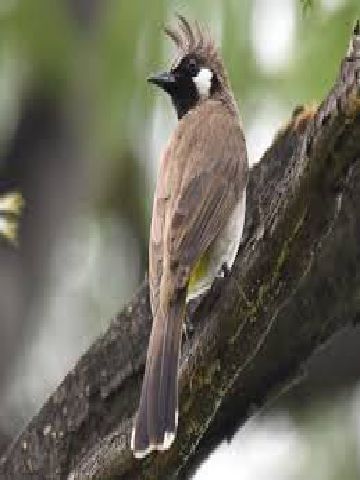

In [23]:
img

In [24]:
img = image.img_to_array(img)
img
# we need 3 channels but here we only have 2 channels so we will have to increase

array([[[132., 143., 103.],
        [132., 143., 103.],
        [132., 143., 103.],
        ...,
        [127., 150.,  94.],
        [127., 150.,  94.],
        [127., 150.,  94.]],

       [[132., 143., 103.],
        [132., 143., 103.],
        [132., 143., 103.],
        ...,
        [127., 150.,  94.],
        [127., 150.,  94.],
        [127., 150.,  94.]],

       [[133., 144., 104.],
        [132., 143., 103.],
        [132., 143., 103.],
        ...,
        [127., 148.,  92.],
        [127., 148.,  92.],
        [129., 150.,  94.]],

       ...,

       [[ 86.,  78.,  76.],
        [ 86.,  78.,  76.],
        [ 86.,  78.,  76.],
        ...,
        [118., 126., 105.],
        [118., 126., 105.],
        [119., 127., 106.]],

       [[ 86.,  78.,  76.],
        [ 86.,  78.,  76.],
        [ 86.,  78.,  76.],
        ...,
        [118., 126., 105.],
        [118., 126., 105.],
        [119., 127., 106.]],

       [[ 86.,  78.,  76.],
        [ 86.,  78.,  76.],
        [ 86.,  

In [25]:
img = np.expand_dims(img,axis=0)
img # now we have expanded the number of channels from 2 to 3

array([[[[132., 143., 103.],
         [132., 143., 103.],
         [132., 143., 103.],
         ...,
         [127., 150.,  94.],
         [127., 150.,  94.],
         [127., 150.,  94.]],

        [[132., 143., 103.],
         [132., 143., 103.],
         [132., 143., 103.],
         ...,
         [127., 150.,  94.],
         [127., 150.,  94.],
         [127., 150.,  94.]],

        [[133., 144., 104.],
         [132., 143., 103.],
         [132., 143., 103.],
         ...,
         [127., 148.,  92.],
         [127., 148.,  92.],
         [129., 150.,  94.]],

        ...,

        [[ 86.,  78.,  76.],
         [ 86.,  78.,  76.],
         [ 86.,  78.,  76.],
         ...,
         [118., 126., 105.],
         [118., 126., 105.],
         [119., 127., 106.]],

        [[ 86.,  78.,  76.],
         [ 86.,  78.,  76.],
         [ 86.,  78.,  76.],
         ...,
         [118., 126., 105.],
         [118., 126., 105.],
         [119., 127., 106.]],

        [[ 86.,  78.,  76.],
       

In [ ]:
np.argmax(model.predict(img))

1/1 [==============================] - 0s 250ms/step


14

TRANSFER LEARNING(USING RESNET50 MODEL)

In [15]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model

In [ ]:
resnet = ResNet50(include_top=False,input_shape=(480,360,3))

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
for layer in resnet.layers:
  layer.trainable=False

In [ ]:
x = Flatten()(resnet.output)

In [ ]:
out = Dense(16, activation='softmax')(x)

In [ ]:
res_model = Model(inputs=resnet.input,outputs=out)

In [ ]:
res_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 480, 360, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 486, 366, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 240, 180, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [ ]:
res_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
res_model.fit(train,epochs=10,validation_data=test,steps_per_epoch=len(train),
              validation_steps=len(test))

Epoch 1/5
19/19 [==============================] - 112s 6s/step - loss: 211.6582 - accuracy: 0.0533 - val_loss: 101.7949 - val_accuracy: 0.1210
Epoch 2/5
19/19 [==============================] - 99s 5s/step - loss: 117.4036 - accuracy: 0.1200 - val_loss: 92.2789 - val_accuracy: 0.0573
Epoch 3/5
19/19 [==============================] - 98s 5s/step - loss: 68.0749 - accuracy: 0.0800 - val_loss: 50.2729 - val_accuracy: 0.0764
Epoch 4/5
19/19 [==============================] - 99s 5s/step - loss: 56.0608 - accuracy: 0.1800 - val_loss: 59.1209 - val_accuracy: 0.1274
Epoch 5/5
19/19 [==============================] - 100s 5s/step - loss: 51.3643 - accuracy: 0.2133 - val_loss: 78.5587 - val_accuracy: 0.1274


### TRANSFER LEARNING(USING RESNET50 MODEL)

In [9]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

In [10]:
vgg = VGG16(include_top=False,weights='imagenet',input_shape=(480,360,3))

58889256/58889256 [==============================] - 2s 0us/step


In [11]:
for layer in vgg.layers:
  layer.trainable=False

In [12]:
x = Flatten()(vgg.output)

In [13]:
# output layer

prediction = Dense(16,activation='softmax')(x)

In [16]:
# Create Vgg16 model

model = Model(inputs=vgg.input,outputs=prediction)

In [17]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 480, 360, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 480, 360, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 480, 360, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 240, 180, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 240, 180, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 240, 180, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 120, 90, 128)      0     

In [18]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [19]:
model.fit_generator(train,validation_data=test,epochs=10,steps_per_epoch=len(train),
                    validation_steps=len(test))

<ipython-input-19-240d737b1fe6>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train,validation_data=test,epochs=10,steps_per_epoch=len(train),


Epoch 1/10
19/19 [==============================] - 140s 7s/step - loss: 8.1699 - accuracy: 0.2267 - val_loss: 7.1617 - val_accuracy: 0.2102
Epoch 2/10
19/19 [==============================] - 97s 5s/step - loss: 3.9472 - accuracy: 0.4467 - val_loss: 5.5804 - val_accuracy: 0.3758
Epoch 3/10
19/19 [==============================] - 98s 5s/step - loss: 1.6835 - accuracy: 0.5800 - val_loss: 5.3894 - val_accuracy: 0.3057
Epoch 4/10
19/19 [==============================] - 99s 5s/step - loss: 1.5214 - accuracy: 0.6200 - val_loss: 5.3837 - val_accuracy: 0.3631
Epoch 5/10
19/19 [==============================] - 98s 5s/step - loss: 1.1844 - accuracy: 0.7200 - val_loss: 6.1594 - val_accuracy: 0.3503
Epoch 6/10
19/19 [==============================] - 96s 5s/step - loss: 1.7278 - accuracy: 0.6933 - val_loss: 7.8838 - val_accuracy: 0.2038
Epoch 7/10
19/19 [==============================] - 126s 7s/step - loss: 1.5513 - accuracy: 0.7000 - val_loss: 6.5811 - val_accuracy: 0.3312
Epoch 8/10
19/19 [

In [20]:
loss, accuracy = model.evaluate(test)

20/20 [==============================] - 53s 3s/step - loss: 6.1179 - accuracy: 0.3567


In [26]:
np.argmax(model.predict(img))

1/1 [==============================] - 1s 966ms/step


4